In [6]:
from google.colab import files
import pandas
uploaded = files.upload()
for filename in uploaded.keys():
    print('Uploaded file:', filename)
uploaded_filename = list(uploaded.keys())[0]
weather_data = pandas.read_csv(uploaded_filename)


Saving weather_data.csv to weather_data (2).csv
Uploaded file: weather_data (2).csv


Saving weather_data.csv to weather_data (3).csv
Uploaded file: weather_data (3).csv


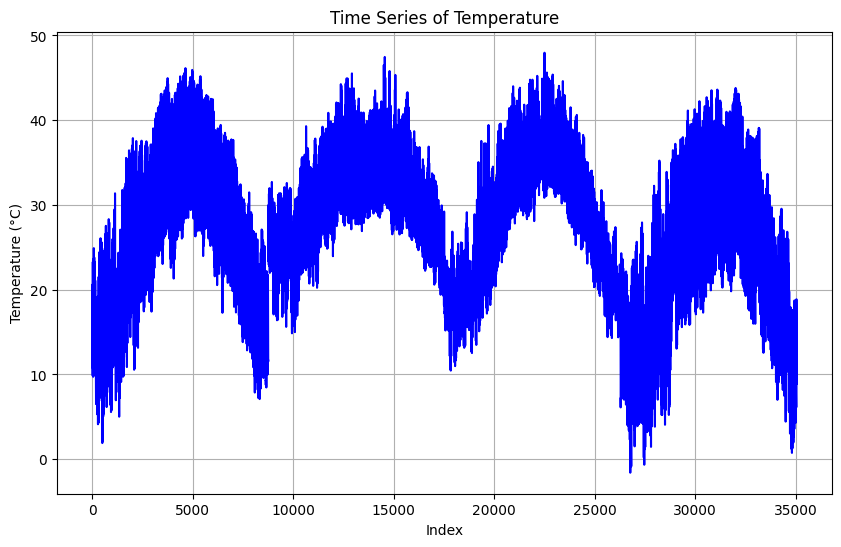

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(weather_data['TEMP'], color='blue')
plt.title('Time Series of Temperature')
plt.xlabel('Index')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()


In [59]:
import pandas as pd
import plotly.graph_objects as go
average_temp_by_month = weather_data.groupby('MO')['TEMP'].mean()
fig = go.Figure(go.Bar(x=average_temp_by_month.index, y=average_temp_by_month.values,
                       marker_color='purple'))

fig.update_layout(title='Average Temperature by Month',
                  xaxis=dict(title='Month'),
                  yaxis=dict(title='Average Temperature (°C)'),
                  width=800,
                  height=500)
fig.show()


In [57]:
import pandas as pd
import plotly.graph_objects as go
average_temp_by_year = weather_data.groupby('YEAR')['TEMP'].mean()
average_temp_by_day = weather_data.groupby('DAY')['TEMP'].mean()
average_temp_by_hour = weather_data.groupby('HR')['TEMP'].mean()


fig = go.Figure()


fig.add_trace(go.Scatter(x=average_temp_by_day.index[:200], y=average_temp_by_day.values[:200],
                          mode='lines', line=dict(color='black'), name='Daily Temperature'))

fig.add_trace(go.Scatter(x=average_temp_by_hour.index[:200], y=average_temp_by_hour.values[:200],
                          mode='lines', line=dict(color='purple'), name='Hourly Temperature'))

fig.update_layout(title='Average Temperature Over Time',
                  xaxis=dict(title='Time', range=[0, 25]),  # Limit x-axis to first 200 data points
                  yaxis=dict(title='Average Temperature (°C)'),
                  width=800,
                  height=600)

fig.show()


In [70]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
fig = make_subplots(rows=4, cols=3, subplot_titles=[f"Month {i}" for i in range(1, 13)], shared_yaxes=True)
for i, month in enumerate(range(1, 13)):
    temp_data = weather_data[weather_data['MO'] == month]
    average_temp = temp_data.groupby('DAY')['TEMP'].mean()
    color = f'hsl({i * 30},50%,50%)'
    fig.add_trace(go.Scatter(x=average_temp.index, y=average_temp.values,
                             mode='lines', line=dict(color=color), name=f'Month {month}'),
                  row=(i // 3) + 1, col=(i % 3) + 1)
fig.update_layout(title='Average Temperature by Month',
                  xaxis=dict(title='Day'),
                  yaxis=dict(title='Average Temperature (°C)'),
                  height=800,
                  width=1000)
fig.show()


In [76]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
fig = make_subplots(rows=4, cols=3, subplot_titles=[f"Month {i}" for i in range(1, 13)], shared_yaxes=True)
for i, month in enumerate(range(1, 13)):
    temp_data = weather_data[weather_data['MO'] == month]
    average_temp = temp_data.groupby('DAY')['TEMP'].mean()
    color = f'hsl({i * 30},50%,50%)'
    fig.add_trace(go.Bar(x=average_temp.index, y=average_temp.values,
                         marker_color=color, name=f'Month {month}'),
                  row=(i // 3) + 1, col=(i % 3) + 1)
fig.update_layout(title='Average Temperature by Month',
                  xaxis=dict(title='Day'),
                  yaxis=dict(title='Average Temperature (°C)'),
                  height=800,
                  width=1000)
fig.show()


In [87]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
fig = make_subplots(rows=4, cols=3, subplot_titles=[f"Month {i}" for i in range(1, 13)], shared_yaxes=True)
for i, month in enumerate(range(1, 13)):
    temp_data = weather_data[weather_data['MO'] == month]
    temperatures = temp_data['TEMP']
    fig.add_trace(go.Box(y=temperatures, name=f'Month {month}'), row=(i // 3) + 1, col=(i % 3) + 1)
fig.update_layout(title='Temperature by Month (Box Plot)',
                  xaxis=dict(title='Month'),
                  yaxis=dict(title='Temperature (°C)'),
                  width=1500,
                  height=800)
fig.show()


In [91]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
fig = make_subplots(rows=4, cols=3, subplot_titles=[f"Month {i}" for i in range(1, 13)], shared_yaxes=True)
for i, month in enumerate(range(1, 13)):
    temp_data = weather_data[weather_data['MO'] == month]
    temperatures = temp_data['TEMP']
    days = temp_data['DAY']
    fig.add_trace(go.Scatter(x=days, y=temperatures, mode='markers', name=f'Month {month}'), row=(i // 3) + 1, col=(i % 3) + 1)
fig.update_layout(title='Temperature by Month (Scatter Plot)',
                  xaxis=dict(title='Day'),
                  yaxis=dict(title='Temperature (°C)'),
                  width=1500,
                  height=800)
fig.show()


In [184]:
import pandas as pd
import plotly.graph_objects as go

weather_data['YEAR'] = pd.to_datetime(weather_data['YEAR'], format='%Y')
weather_data['HR'] = pd.to_datetime(weather_data['HR'], format='%H:%M:%S').dt.time

average_humidity_by_year = weather_data.groupby(weather_data['YEAR'].dt.year)['HUMIDITY'].mean()
years = average_humidity_by_year.index
average_humidity_by_hour = weather_data.groupby(weather_data['HR'])['PRESSURE'].mean()
hours = average_humidity_by_hour.index

fig_year = go.Figure(go.Scatter(x=years, y=average_humidity_by_year, mode='lines+markers'))
fig_year.update_layout(title='Average Humidity by Year',
                       xaxis_title='Year',
                       yaxis_title='Humidity')

fig_hour = go.Figure(go.Scatter(x=hours, y=average_humidity_by_hour, mode='lines+markers'))
fig_hour.update_layout(title='Average Pressure by Hour',
                       xaxis_title='Hour of the Day',
                       yaxis_title='Humidity')

fig_year.show()
fig_hour.show()

In [123]:
import pandas as pd
import plotly.graph_objects as go
average_humidity_by_month = weather_data.groupby('MO')['HUMIDITY'].mean()
months = average_humidity_by_month.index
fig_month = go.Figure(go.Bar(x=months, y=average_humidity_by_month, marker_color='blue'))
fig_month.update_layout(title='Average Humidity by Month',
                        xaxis_title='Month',
                        yaxis_title='Humidity')
fig_month.show()


In [144]:
import pandas as pd
import plotly.graph_objects as go
fig_height = 800
fig_width = 800
fig = go.Figure(go.Scatter(x=weather_data['TEMP'], y=weather_data['PRESSURE'], mode='markers'))
fig.update_layout(title='Scatter Plot of Temperature vs. Pressure',
                  xaxis_title='Temperature (°C)',
                  yaxis_title='Pressure',
                  height=fig_height,
                  width=fig_width)
fig.show()


In [151]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
weather_data = weather_data.dropna(subset=['HUMIDITY', 'PRESSURE'])
rows = 4
cols = 3

fig = make_subplots(rows=rows, cols=cols, subplot_titles=weather_data['MO'].unique())
for i, month in enumerate(weather_data['MO'].unique(), start=1):
    month_data = weather_data[weather_data['MO'] == month]
    fig.add_trace(go.Scatter(x=month_data['HUMIDITY'], y=month_data['PRESSURE'], mode='markers', name='Scatter Plot'),
                   row=(i - 1) // cols + 1, col=(i - 1) % cols + 1)
fig.update_layout(title='Humidity vs. Pressure Scatter Plots for Each Month', showlegend=False)
fig.show()


In [154]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
weather_data = weather_data.dropna(subset=['TEMP', 'PRESSURE'])
fig_general = go.Figure(go.Scatter(x=weather_data['TEMP'], y=weather_data['PRESSURE'], mode='markers'))
fig_general.update_layout(title='Temperature vs. Pressure (General Scatter Plot)',
                          xaxis_title='Temperature (°C)',
                          yaxis_title='Pressure')
months = weather_data['MO'].unique()
rows = 4
cols = 3

fig_subplots = make_subplots(rows=rows, cols=cols,
                              subplot_titles=months,
                              shared_xaxes=True, shared_yaxes=True)
for i, month in enumerate(months, start=1):
    month_data = weather_data[weather_data['MO'] == month]
    fig_subplots.add_trace(go.Scatter(x=month_data['TEMP'], y=month_data['PRESSURE'], mode='markers', name=month),
                           row=(i - 1) // cols + 1, col=(i - 1) % cols + 1)
fig_subplots.update_layout(title='Temperature vs. Pressure Scatter Plots for Each Month',
                            showlegend=False)
fig_general.show()
fig_subplots.show()


In [166]:
import pandas as pd
import plotly.express as px
from plotly.subplots import make_subplots
weather_data['MO'] = pd.to_datetime(weather_data['MO'], format='%B').dt.month_name()
weather_data = weather_data.dropna(subset=['TEMP'])
months = weather_data['MO'].unique()
fig = make_subplots(rows=4, cols=3, subplot_titles=months)
for i, month in enumerate(months, start=1):
    month_data = weather_data[weather_data['MO'] == month]
    mean_temperatures = month_data.groupby('CITY')['TEMP'].mean().reset_index()
    fig.add_trace(go.Bar(x=mean_temperatures['CITY'], y=mean_temperatures['TEMP'], name=month), row=(i - 1) // 3 + 1, col=(i - 1) % 3 + 1)

fig.update_layout(title='Mean Temperatures by City for Each Month', showlegend=False)
fig.show()


In [170]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
weather_data = weather_data.dropna(subset=['MO'])
weather_data['MO'] = pd.to_datetime(weather_data['MO'], format='%B').dt.month_name()
weather_data = weather_data.dropna(subset=['PRESSURE'])
months = weather_data['MO'].unique()
fig = make_subplots(rows=4, cols=3, subplot_titles=months)
for i, month in enumerate(months, start=1):
    month_data = weather_data[weather_data['MO'] == month]
    mean_pressure = month_data.groupby('CITY')['PRESSURE'].mean().reset_index()
    fig.add_trace(go.Scatter(x=mean_pressure['CITY'], y=mean_pressure['PRESSURE'], mode='lines', name=month), row=(i - 1) // 3 + 1, col=(i - 1) % 3 + 1)

fig.update_layout(title='Mean Pressure by City for Each Month', showlegend=False)

fig.show()
